In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..')))
os.chdir('..')
from data.DataObject import DataObject

### Instantiate the DataObject class

In [2]:
do = DataObject()

### Atomic Map HDU and WCS

In [3]:
atomic_data_hdu = do.get_atomic_map_hdu()
atomic_data_wcs = do.get_atomic_map_wcs()

#### Star coordinates on Atomic Map

In [4]:
atomic_rsg_i_component, atomic_rsg_j_component = do.rsgs_on_gas_map_array(atomic_data_hdu)
rsgs_on_atomic_map = atomic_data_hdu.data[atomic_rsg_i_component, atomic_rsg_j_component]

atomic_wr_i_component, atomic_wr_j_component = do.wrs_on_gas_map_array(atomic_data_hdu)
wrs_on_atomic_map = atomic_data_hdu.data[atomic_wr_i_component, atomic_wr_j_component]

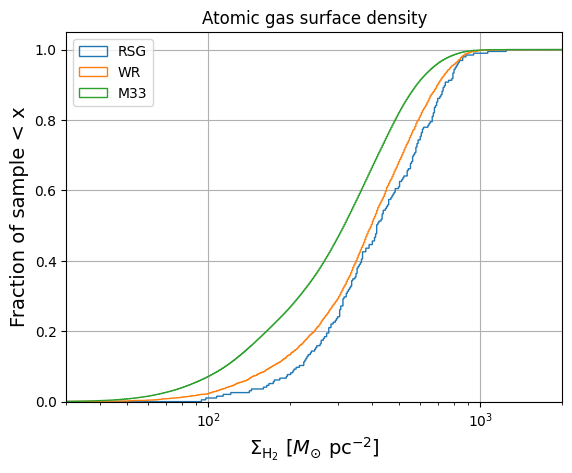

In [7]:
plt.hist(
    rsgs_on_atomic_map,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="WR",
)
plt.hist(
    wrs_on_atomic_map,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="RSG",
)
plt.hist(
    atomic_data_hdu.data.flatten(),
    bins=np.logspace(0, 4, 1000),
    histtype="step",
    cumulative=True,
    density=True,
    label="M33",
)
plt.xscale("log")
plt.xlabel("$\Sigma_{\mathrm{H_2}} \ [M_{\odot} \ \mathrm{pc}^{-2}]$", fontsize=14)
plt.ylabel("Fraction of sample < x", fontsize=14)
plt.title("Atomic gas surface density")
plt.xlim(30, 2000)
plt.legend(loc="upper left", labels=['RSG', 'WR', 'M33'])
plt.grid()